# importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import the CSV data as pandas Dataframe

In [3]:
df=pd.read_csv('D:/python for data science/Mlprojects/notebook/data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

Data Checks to perform

check missing values
check Duplicates
check data type
check the number of unique values of each column
check statistics of data set
check various categories present in the different categorical column

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there is no missing values in the dataset

checking the duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

there are no duplicates found in the dataset

checking the no.of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check statistics of dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("categories in 'gender' variable:    ",end="  "   )
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:    ",end="  "   )
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:    ",end="  "   )
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:    ",end="  "   )
print(df['lunch'].unique()) 

print("categories in 'test_preparation_course' variable:    ",end="  "   )
print(df['test_preparation_course'].unique())


categories in 'gender' variable:      ['female' 'male']
categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:      ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_col=[col for col in df.columns if df[col].dtype!='O']
categorical_col=[col for col in df.columns if df[col].dtype=='O']


#print columns
print('we have {} numerical columns : {}'.format(len(numeric_col),numeric_col))
print('we have {} categorical columns : {}'.format(len(categorical_col),categorical_col))

we have 3 numerical columns : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "Total score " and "Average"

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df[df['reading_score'] ==100]['average'].count()
writing_full=df[df['writing_score'] ==100]['average'].count()
math_full=df[df['math_score'] ==100]['average'].count()

print('no.of students with full score in reading :',reading_full)
print('no.of students with full score in writing :',writing_full)   
print('no.of students with full score in math :',math_full)

no.of students with full score in reading : 17
no.of students with full score in writing : 14
no.of students with full score in math : 7


In [16]:
reading_less_20=df[df['reading_score'] <20]['average'].count()
writing_less_20=df[df['writing_score'] <20]['average'].count()  
math_less_20=df[df['math_score'] <20]['average'].count()
print('no.of students with less than 20 score in reading :',reading_less_20)
print('no.of students with less than 20 score in writing :',writing_less_20)
print('no.of students with less than 20 score in math :',math_less_20)

no.of students with less than 20 score in reading : 1
no.of students with less than 20 score in writing : 3
no.of students with less than 20 score in math : 4


### exploring Data (visualization)

###### Visualize average score distribution to make some consclusion

##### Histogram & kernel distribution function

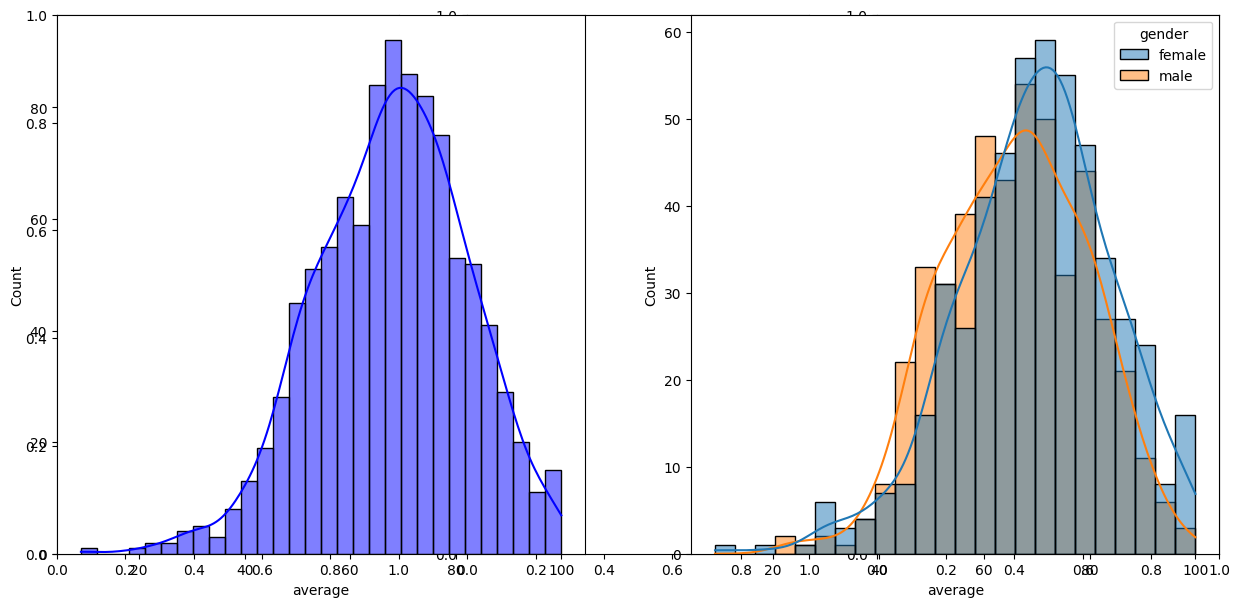

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='blue',bins=30)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

### conclusions

Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.